# Noise Interferometry Test
This tests the functionality of the noise interferometry module of ooipy

## Sections
- Compute Cross Correlation for specified window

First, let's import all dependancies

In [1]:
import os
import sys
cwd = os.getcwd()
ooipy_dir = os.path.dirname(cwd) + '/ooipy'
sys.path.append(ooipy_dir)
from matplotlib import pyplot as plt
import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
from ooipy.hydrophone import Noise_Interferometry as NI
import pickle
import scipy
from gwpy.timeseries import TimeSeries
import seaborn as sns
import gwpy
import progressbar

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Calculating NCF for 1 Average Period

In [2]:
# Create instance of NCF object
avg_time = 60 #minute
start_time = datetime.datetime(2017,3,10,0,0,0)
node1 = '/LJ01C'
node2 = '/PC01A'
filter_cutoffs = [20, 70]
W = 30

NCF0 = NI.NCF(avg_time, start_time, node1, node2, filter_cutoffs, W, verbose=True, whiten=True)
NCF0 = NI.calculate_NCF(NCF0)

plt.plot(NCF0.NCF)

   Getting Audio from Node 1...
   Getting Audio from Node 2...
   Filtering and Whitening Data for Node 1...
   Filtering and Whitening Data for Node 2...
   Correlating Data...
   Time to Calculate NCF for 1 Average Period: 66.16511726379395 




# Loop Through 2 instances of NCF Calculation

In [6]:
NI.calculate_NCF_loop(2, node1, node2, 1, start_time, W,  filter_cutoffs, verbose=True, whiten=True)

Calculting NCF for Period 1:
   Getting Audio from Node 1...
   Getting Audio from Node 2...
   Filtering and Whitening Data for Node 1...
   Filtering and Whitening Data for Node 2...
   Correlating Data...
   Time to Calculate NCF for 1 Average Period: 9.200584411621094 


Calculting NCF for Period 2:
   Getting Audio from Node 1...
   Getting Audio from Node 2...
   Filtering and Whitening Data for Node 1...
   Filtering and Whitening Data for Node 2...
   Correlating Data...
   Time to Calculate NCF for 1 Average Period: 9.003805160522461 




# NCF_analysis toolset

Start Time: 2017-07-01 00:00:00
Frequency Range: [ 1 90]
Hydrophone Type: low_frequency
Number of Average Periods: 600
Node 1: Central_Caldera
Node 2: Eastern_Caldera
Window Length (s): 30
Signal Processing Method: phase_weight
Specific Notes: Butterworth and Hann Window for whitening. No Low bound on frequency (HARDCODED CHANGE!)
Distance Between Nodes: 3.186 km
Bearing from node 1 to 2: 121.6 °
1.79e+08


<Figure size 432x288 with 0 Axes>

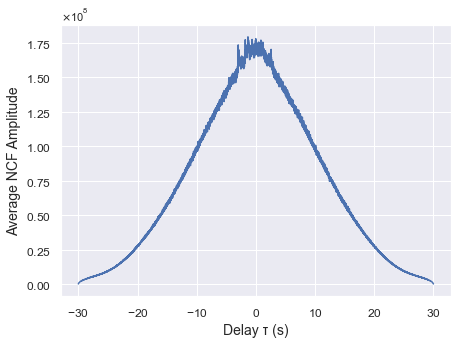

In [2]:
import NCF_analysis as NCF
file_name = "/Users/jhrag/UW/Ocean_Acoustics/Code/Noise_Interferometry/NCFs/ckpts_23"
exp1 = NCF.NCF_analysis(file_name, verbose=True)


fig2 = plt.figure()
xcorr = exp1.average_NCF(0,600, plot=True)

scientific_notation = "{:.2e}".format(np.max(np.abs(xcorr)))
print(scientific_notation)

In [ ]:


exp1.available_hours()

Time of Max Peak: -2.102500000005552


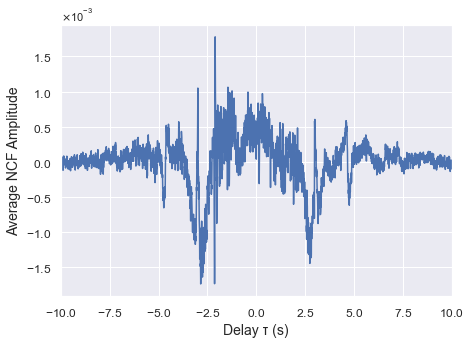

In [4]:
# Save Figure

exp1.NCF_plot(exp1.xcorr, 572, save_fig=False, file_name = 'Sabra_butterworth', frequency=False, symetric=False, xlimits=[-10,10], ylimits=None, print_time_delay=True)

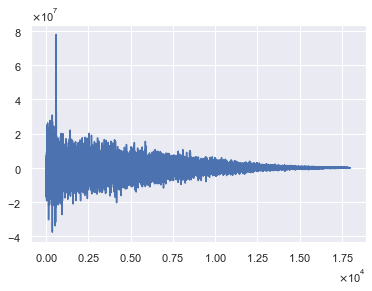

In [7]:
# Create Sum of Both Sides
import math as m

xcorr1 = xcorr[:m.floor(len(xcorr)/2)]
xcorr2 = xcorr[m.ceil(len(xcorr)/2):]

plt.plot(xcorr2 + np.flip(xcorr1))

[======================================================================= ]  98%

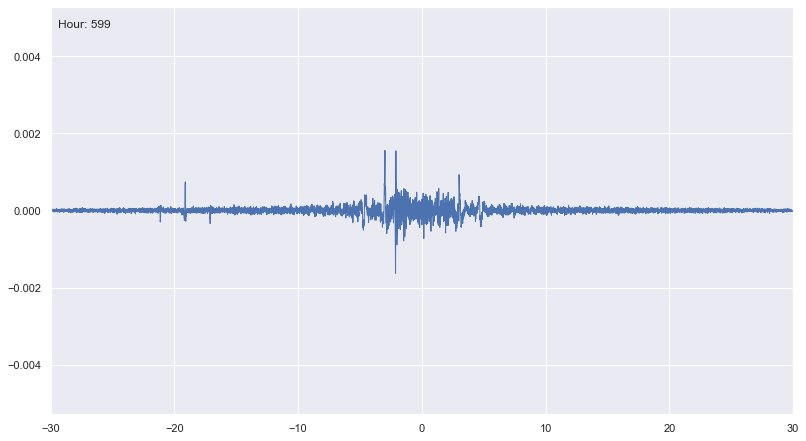

In [97]:
exp1.animate_NCF(600, 10, 'butter_whiten', interval=1)

[======================================================================= ]  98%

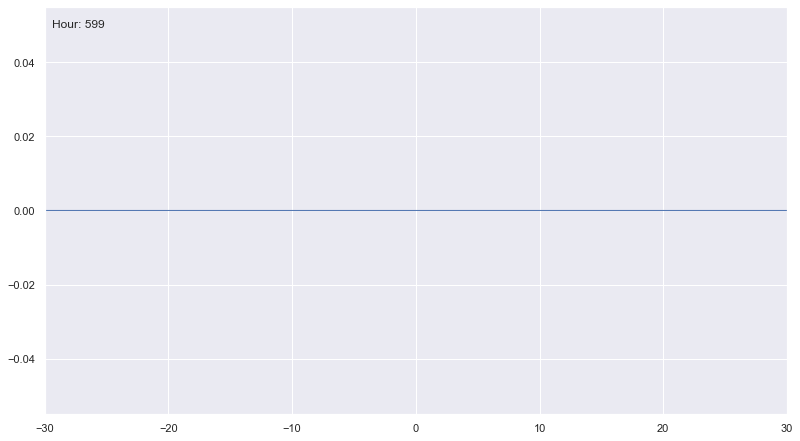

In [120]:
# Animate TDOA
exp1.animate_tdoa2(600, 10, 'tdoa_animation_butter_whiten', interval=1)

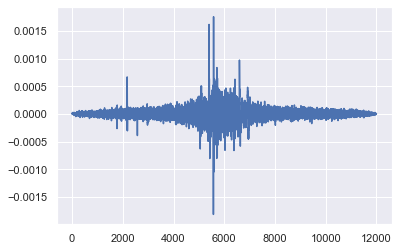

# Create Spectrogram of NCF

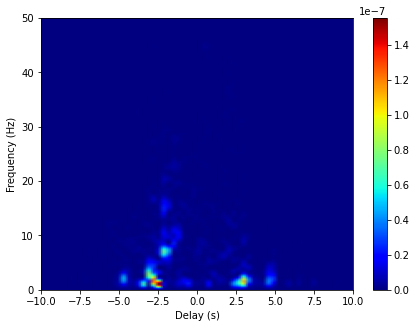

In [7]:
from matplotlib.colors import Normalize
f, t, Sxx = scipy.signal.spectrogram(xcorr, fs=200, nfft=2048, nperseg=128, noverlap=64)
t = t-30
sns.reset_orig()
vmin=0
vmax=np.max(Sxx)*1

fig1 = plt.figure(figsize=(7,5))

plt.pcolormesh(t, f, Sxx, shading='gouraud',cmap=plt.cm.jet, norm=Normalize(vmin=vmin, vmax=vmax))
plt.ylim([0,50])
plt.xlim([-10,10])
plt.xlabel('Delay (s)')
plt.ylabel('Frequency (Hz)')

plt.colorbar()

# fig1.savefig('spectrogram_sabra_freqclip_compressed.png',dpi=500)

# Editing Header File
For specific edits, hard code change the function NCF_tools.edit_header()

In [49]:
import NCF_analysis as NCF
file_name = "/Volumes/John's Passport/University of Washington/NCFs/ckpts_15"
exp1 = NCF.NCF_analysis(file_name)

exp1.edit_header()

exp1.read_header()

2017-03-10 00:00:00
[  0.5  10. ]
low_frequency
300
Central_Caldera
Eastern_Caldera
30
sabra
Experimenting with smaller frequency band
2017-03-10 00:00:00
[  0.5  10. ]
low_frequency
600
Central_Caldera
Eastern_Caldera
30
sabra
Experimenting with smaller frequency band


# Playing with Phase Information
must load exp using NCF_analysis toolset

[                                                                        ] N/A%/Users/jhrag/opt/anaconda3/envs/ooi/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
[======================================================================= ]  98%

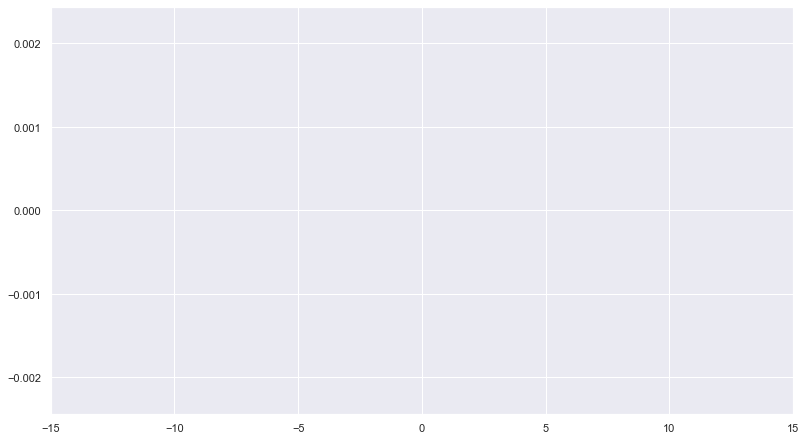

In [126]:
exp1.animate_phase(exp1.xcorr, 'phase_animation_butter_white', xlim=[-15,15])

# Debug SNR_plot

CPU times: user 7.45 s, sys: 4.62 s, total: 12.1 s
Wall time: 12.1 s


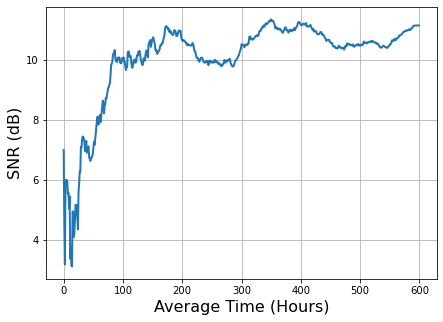

In [6]:
%%time
sns.reset_orig()
import NCF_analysis as NCF
file_name = "/Users/jhrag/UW/Ocean_Acoustics/Code/Noise_Interferometry/NCFs/ckpts_22"
exp1 = NCF.NCF_analysis(file_name)


SNR = exp1.SNR_plot(1,600, plot=True, savefig=False, file_name = 'SNR_Sabra_butter_hann_lead_peak.png')

## Get plot of SNR on top of spectrogram

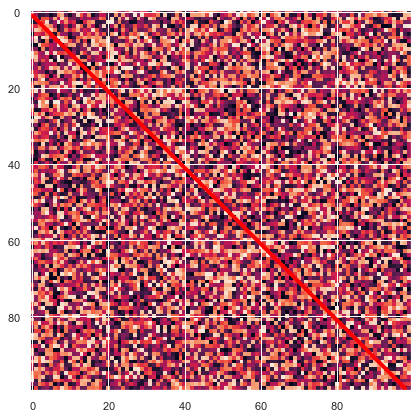

In [114]:
# first check on matplotlib
f, ax = plt.subplots(figsize=(10,7))

ax.imshow(np.random.rand(100,100))
ax.plot(np.arange(1,100), linewidth=4, color='red')

In [9]:
# Get Spectrogram Values
import pickle
import progressbar
spec_start = 0
spec_end = 600


bar = progressbar.ProgressBar(maxval=spec_end-spec_start, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()

time = []
for k in range(spec_start,spec_end):
    file_path = f'/Users/jhrag/UW/Ocean_Acoustics/Code/Spectrograms/Central_Caldera_July/spectrogram{k:03}.pkl'
    try:
        with open(file_path, 'rb') as f:
            spec = pickle.load(f)
    except:
        #values_NaN = np.empty((60,2049))
        #values_NaN[:] = np.nan
        #time_NaN = np.empty(60)
        #time_NaN[:] = np.nan
        #values = np.vstack((values,values_NaN))
        #times = np.hstack((times,time_NaN))
        continue
    if spec == None:
        #values_NaN = np.empty((60,2049))
        #values_NaN[:] = np.nan
        #time_NaN = np.empty(60)
        #time_NaN[:] = np.nan
        #values = np.vstack((values,values_NaN))
        #times = np.hstack((times,time_NaN))
        continue
    
    time_UTC = spec.time
    if k == spec_start:
        freq = spec.freq
    for n in range(len(time_UTC)):
        if n == 0:
            time = [time_UTC[n].datetime]
        else:
            time.append(time_UTC[n].datetime)
    if k == spec_start:
        values = spec.values
        times = np.asarray(time)
    else:
        values = np.vstack((values,spec.values))
        times = np.hstack((times,np.asarray(time)))
    bar.update(k- spec_start)
    

[======================================================================= ]  98%

In [10]:
# Generate alternate time variables
from datetime import timedelta

times_delta = []
times_new = np.zeros((len(times),1))
for k in range(len(times)):
    times_delta.append(times[k]-times[0])
    
    times_new[k] = times_delta[k].days*24 + times_delta[k].seconds/3600


times_new = np.squeeze(times_new)

print(np.shape(times_new))

(35621,)


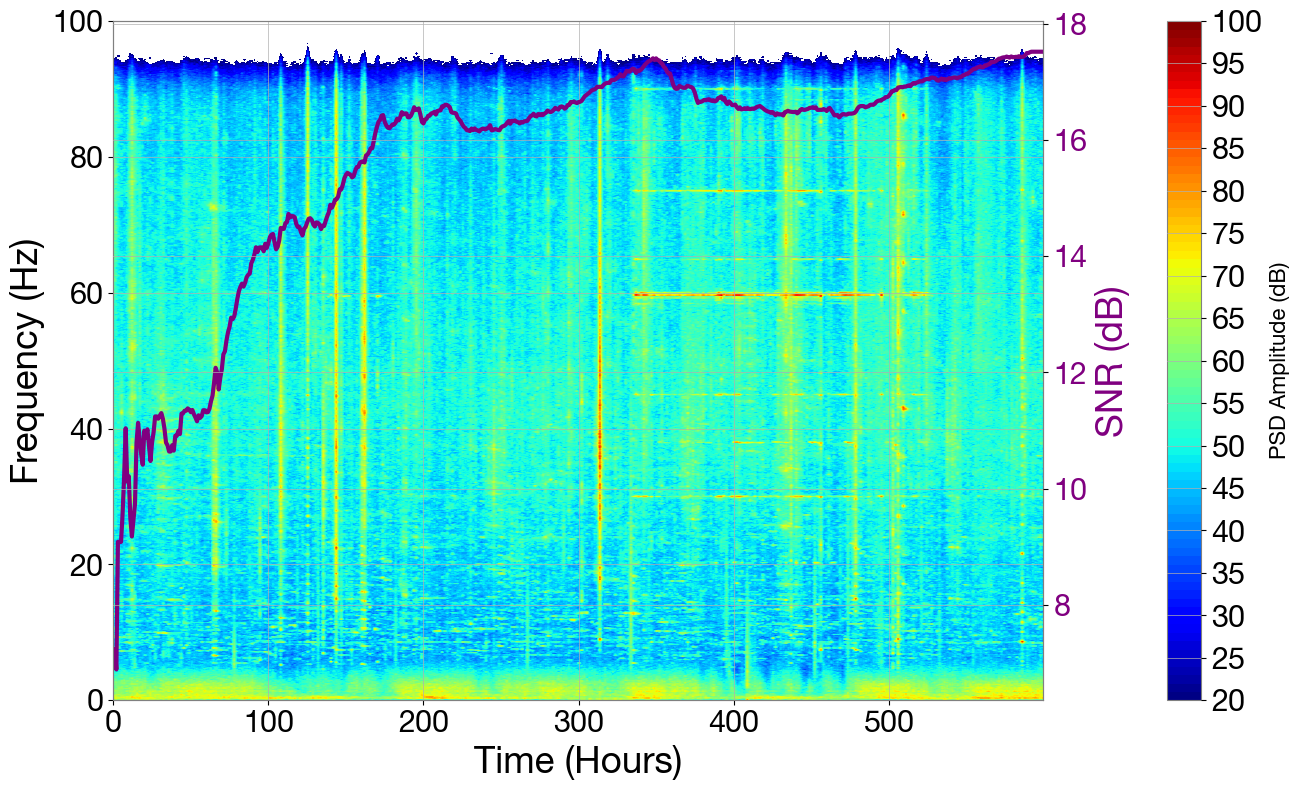

In [11]:
import matplotlib.colors as colors
import matplotlib

sns.reset_orig()
vmin = 20
vmax = 100
vdelta = 1
figsize = (16,9)
dpi = 100
fmin = 0
fmax = 100
time_limits = None
xlabel_rot = 0
time = times_new
ylabel = 'Frequency (Hz)'
xlabel = 'Time (Hours)'
vdelta_cbar = 5

res_reduction_time = 100
res_reduction_freq = 1


font = {'size': 22}
matplotlib.rc('font', **font)
        
v = values[::res_reduction_time, ::res_reduction_freq]

if len(time) != len(values):
    t = np.linspace(0, len(values) - 1,
                    int(len(values) / res_reduction_time))
else:
    t = time[::res_reduction_time]
            
        
if len(freq) != len(values[0]):
    f = np.linspace(0, len(values[0]) - 1,
                    int(len(values[0]) / res_reduction_freq))
else:
    f = freq[::res_reduction_freq]
            
cbarticks = np.arange(vmin, vmax + vdelta, vdelta)
fig, ax = plt.subplots(figsize=(figsize), dpi=dpi)
im = ax.contourf(t, f, np.transpose(v), cbarticks,
                 norm=colors.Normalize(vmin=vmin, vmax=vmax),
                 cmap=plt.cm.jet)
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.ylim([fmin, fmax])
if time_limits is not None:
    plt.xlim(time_limits)
plt.xticks(rotation=xlabel_rot)
#plt.title(title)
cbar = plt.colorbar(im, ax=ax,
             ticks=np.arange(vmin, vmax + vdelta, vdelta_cbar), pad=0.1)

cbar.ax.set_ylabel('PSD Amplitude (dB)', rotation=90, fontsize='16')
plt.tick_params(axis='y')


# Add SNR Plot
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'purple'
ax2.set_ylabel('SNR (dB)', color=color)  # we already handled the x-label with ax1
ax2.plot(SNR, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)

fig.savefig('SNR_and_Spectrogram_time_EQ.png',dpi=dpi)

# Debugging Map Bearing Features

In [37]:
import NCF_analysis as NCF
file_name = "/Users/jhrag/UW/Ocean_Acoustics/Code/Noise_Interferometry/NCFs/ckpts_16"
exp1 = NCF.NCF_analysis(file_name, verbose=True)

Start Time: 2017-07-01 00:00:00
Frequency Range: [ 1 90]
Hydrophone Type: low_frequency
Number of Average Periods: 600
Node 1: Central_Caldera
Node 2: Eastern_Caldera
Window Length (s): 30
Signal Processing Method: sabra
Specific Notes: Looking at summertime NCF
Distance Between Nodes: 3.186 km
Bearing from node 1 to 2: 121.6 °


In [38]:
bearing = exp1.get_bearing_angle(-1.4325000000056853)

exp1.plot_map_bearing(bearing)

# Create Plot of 3 different SNRs

In [51]:
sns.reset_orig()
import NCF_analysis as NCF
file_name1 = "/Users/jhrag/UW/Ocean_Acoustics/Code/Noise_Interferometry/NCFs/ckpts_16"
file_name2 = "/Users/jhrag/UW/Ocean_Acoustics/Code/Noise_Interferometry/NCFs/ckpts_18"
exp1 = NCF.NCF_analysis(file_name1)
exp2 = NCF.NCF_analysis(file_name2)

SNR1 = exp1.SNR_plot(1,600, plot=False, savefig=False)
SNR2 = exp2.SNR_plot(1,600, plot=False, savefig=False)

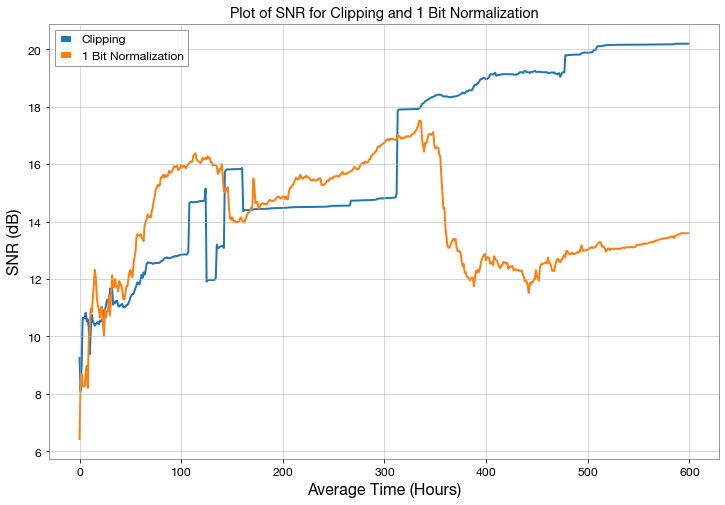

In [55]:
fig = plt.figure(figsize=(12,8))
plt.plot(SNR1, linewidth='2')
plt.plot(SNR2, linewidth='2')
plt.title(f'Plot of SNR for Clipping and 1 Bit Normalization')

plt.xlabel('Average Time (Hours)', fontsize=16)
plt.ylabel('SNR (dB)', fontsize=16)
plt.legend(['Clipping','1 Bit Normalization'])
fig.savefig('SNR of clipping and 1bit', dpi=200)